In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
ROOT_DIR="/content/drive/MyDrive/pjt/score_cam/"
sys.path.append(ROOT_DIR)

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Code to copy 200 random images from dataset_fish_all folder to dataset_f4k_200

In [ ]:
''import os
import random
import shutil

files_list=[]
for root,dir,files in os.walk("/content/drive/MyDrive/pjt/fish/dataset_fish_all/fish_04"):
  for file in files:
    if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            files_list.append(os.path.join(root, file))
file_count = len(files_list)
print (file_count)''

18


In [ ]:
# print files_list   
filesToCopy = random.sample(files_list, 200)  #prints two random files from list 

destPath = "/content/drive/MyDrive/pjt/fish/dataset_f4k_200/fish_04"

# if destination dir does not exists, create it
if os.path.isdir(destPath) == False:
        os.makedirs(destPath)

# iteraate over all random files and move them
for file in filesToCopy:
    shutil.move(file, destPath)

Reading images 

In [ ]:
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk("/content/drive/MyDrive/pjt/fish/dataset_f4k_200", topdown=False): 
  #print(files)
  for name in files:
    #print(name)

    path = os.path.join(root, name)
    #print(path)
    if path.endswith("png"): # We want only the images
      imagepaths.append(path)

Forming X and Y matrix

In [ ]:
X = [] # Image data
y = [] # Labels
import cv2
# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  
  img = np.array(Image.open(path).convert("RGB")) # Reads image and returns np.array
  img = cv2.resize(img, (96,96)) # Reduce image size so training can be faster
  
  X.append(img)
  # Processing label in image 
  category = path.split("/")[7]
  #print (category)
  label = int(category.split("_")[1][1]) # We need to convert 10_down to 00_down, or else it crashes  
  y.append(label)
  #print (label)
  #print (y)
#print (category)

# Turn X and y into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 96,96, 3) # Needed to reshape so CNN knows it's different images
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

Images loaded:  1003
Labels loaded:  1003


In [ ]:
np.save("/content/drive/MyDrive/pjt/fish/X_200.npy",X)
#X1=np.load("content/drive/MyDrive/Colab Notebooks/X1.npy")
np.save("/content/drive/MyDrive/pjt/fish/y_200.npy",y)

Loading already saved X and y dataset matrices

In [ ]:
X=np.load("/content/drive/MyDrive/pjt/fish/X_200.npy")
#X1=np.load("content/drive/MyDrive/Colab Notebooks/X1.npy")
y=np.load("/content/drive/MyDrive/pjt/fish/y_200.npy")

Splitting into test,train and validation datasets

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train1, X_val1, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)

y_train_labels = to_categorical(y_train, num_classes=5)
y_test_labels = to_categorical(y_test, num_classes=5)
y_val_labels = to_categorical(y_val, num_classes=5)
print(y_train)
print(y_train_labels)
print(y_train_labels.shape)

(752, 96, 96, 3)
(564,)
[0 1 2 1 1 3 1 0 2 3 4 1 3 4 3 1 4 4 2 0 4 4 1 2 4 4 1 4 1 3 0 2 3 0 0 2 3
 1 3 1 4 1 0 3 0 2 0 0 2 4 1 3 0 4 1 3 0 3 1 3 3 2 1 1 1 1 2 1 3 4 4 3 2 2
 4 0 3 2 3 3 3 2 1 1 1 0 4 1 0 3 3 4 3 4 1 4 3 2 0 4 1 0 2 1 3 1 2 1 0 0 4
 4 0 0 1 2 0 3 4 4 4 4 2 0 3 0 2 0 0 3 1 2 3 3 1 2 2 0 2 3 3 1 2 3 3 1 4 3
 2 2 0 3 1 4 0 0 4 4 3 0 1 2 3 0 3 1 1 0 4 4 0 4 3 1 3 4 2 3 3 0 1 4 1 4 4
 0 4 1 3 2 3 1 1 4 1 1 1 2 4 3 3 1 4 2 4 1 4 0 0 0 2 2 1 2 2 4 3 4 3 2 3 0
 1 1 1 4 2 1 2 2 3 1 2 3 2 1 3 3 1 0 3 1 2 0 1 0 2 1 2 2 3 1 2 3 1 3 3 3 1
 0 0 2 3 4 0 4 3 4 0 4 0 2 2 0 0 1 2 1 1 1 3 3 0 4 1 4 4 4 4 3 0 4 1 3 1 4
 0 2 4 4 0 2 4 0 0 4 2 4 3 0 4 0 4 4 3 2 0 4 3 3 0 2 2 4 3 4 2 1 4 4 1 4 3
 4 0 0 2 2 3 4 0 1 1 3 4 0 2 3 4 2 4 4 2 1 2 2 4 0 3 1 1 1 4 3 1 3 1 2 3 2
 0 2 2 1 3 1 4 1 3 1 0 3 0 0 2 3 3 0 4 1 1 0 0 2 1 0 1 1 1 0 1 0 1 0 3 1 0
 1 2 3 4 1 0 0 3 2 3 1 1 2 1 4 1 0 0 2 2 3 3 3 2 1 2 2 3 4 3 3 0 2 0 1 2 1
 0 4 4 3 4 3 4 3 3 0 1 4 2 1 1 4 3 4 2 4 1 2 1 0 1 3 4 3 0 3 4 3 4 1 1 2 2
 

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model=VGG16(weights="imagenet",include_top=False,input_shape=X_train[0].shape)
base_model.trainable=False

base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step


preprocess inputs

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
X_train=preprocess_input(X_train1)
X_test=preprocess_input(X_test1)
X_val=preprocess_input(X_val1)

Adding layers to Vgg16 model

In [ ]:
from tensorflow.keras import layers,models
layer_dict = dict([(layer.name, layer) for layer in base_model.layers])

# Getting output tensor of the last VGG layer that we want to include
x = layer_dict['block5_conv3'].output

# Stacking a new simple convolutional network on top of it    
#x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
#x = MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(50, activation='relu')(x)
#x = Dropout(0.5)(x)
x = layers.Dense(20, activation='relu')(x)
#x = Dropout(0.5)(x)
x = layers.Dense(5, activation='softmax')(x)

# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
custom_model = Model(inputs=base_model.input, outputs=x)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:7]:
    layer.trainable = False



In [ ]:
custom_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

Training new custom model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
custom_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = custom_model.fit(X_train, y_train_labels, epochs=20, validation_data=(X_val,y_val_labels),batch_size=32, callbacks=[es])
#history = custom_model.fit(X_train, y_train_labels, epochs=20, validation_data=(X_val,y_val_labels),batch_size=32)

Epoch 1/20
18/18 [==============================] - 71s 4s/step - loss: 2.8626 - accuracy: 0.6418 - val_loss: 0.6153 - val_accuracy: 0.8245
Epoch 2/20
18/18 [==============================] - 69s 4s/step - loss: 0.3507 - accuracy: 0.9238 - val_loss: 0.7720 - val_accuracy: 0.8723
Epoch 3/20
18/18 [==============================] - 69s 4s/step - loss: 0.0621 - accuracy: 0.9805 - val_loss: 0.7833 - val_accuracy: 0.8723
Epoch 4/20
18/18 [==============================] - 69s 4s/step - loss: 0.0390 - accuracy: 0.9929 - val_loss: 1.1467 - val_accuracy: 0.8564
Epoch 5/20
18/18 [==============================] - 69s 4s/step - loss: 0.0086 - accuracy: 0.9982 - val_loss: 0.8792 - val_accuracy: 0.8830
Epoch 6/20
18/18 [==============================] - 71s 4s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.6794 - val_accuracy: 0.8989
Epoch 7/20
18/18 [==============================] - 69s 4s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6584 - val_accuracy: 0.9043
Epoch 8/20
18/18 [==

In [ ]:
custom_model.save('/content/drive/MyDrive/pjt/fish/S3_pjt_nov24_model2_vgg16_200.h5') 

Loading pretrained custom model(vgg 16)

In [ ]:
import tensorflow as tf
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('/content/drive/MyDrive/pjt/fish/S3_pjt_nov24_model2_vgg16_200.h5')

# Show the model architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

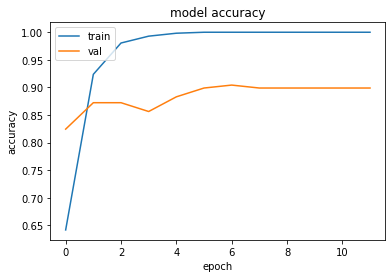

In [ ]:
import keras
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'],loc='upper left')
plt.show()

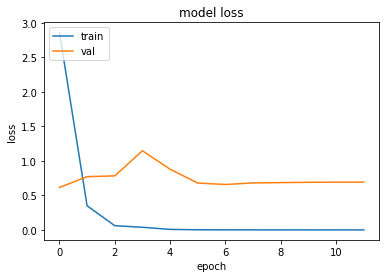

In [ ]:
import keras
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_labels)
print('Test accuracy: {:2.2f}%'.format(test_acc*100))

8/8 [==============================] - 24s 3s/step - loss: 1.2670 - accuracy: 0.9044
Test accuracy: 90.44%


In [ ]:
predictions=model.predict(X_test)

In [ ]:
np.argmax(predictions[0]),y_test[0]

(3, 3)

In [ ]:
# Function to plot images and labels for validation purposes
def validate_5_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["00","01","02","03","04"] 
  plt.figure(figsize=(15,15))
  
  for i in range(1, 30):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
   # img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way

    plt.subplot(6,5,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    true_label1=np.argmax(true_label)
    #print(predicted_label)
    # Change color of title based on good prediction or not
    #print(true_label1)
    if predicted_label == true_label1:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label1]),
                                  color=color)
  plt.savefig('/content/drive/MyDrive/pjt/fish/S3_vgg16_MC_nov24.pdf',dpi=600,bbox_inches='tight')
  plt.savefig('/content/drive/MyDrive/pjt/fish/S3_vgg16_MC_nov24.svg',dpi=600,bbox_inches='tight')
  plt.show()

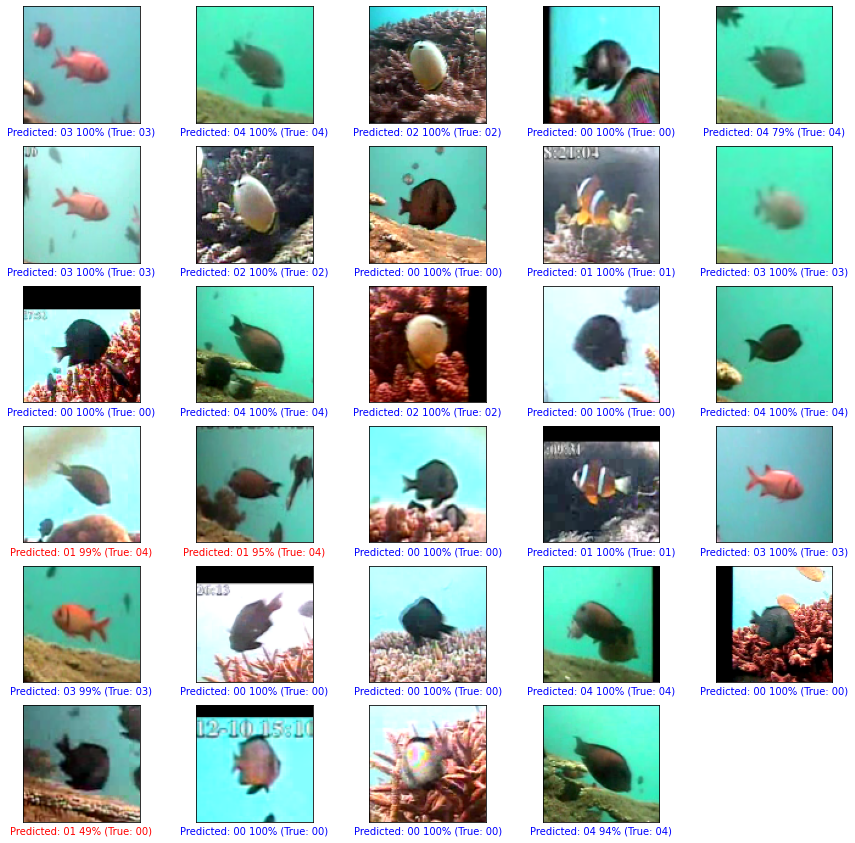

In [ ]:
validate_5_images(predictions, y_test_labels, X_test1)

Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix1(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    title = 'Normalized confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(16, 16))
    #ax.figure(figsize=(16,16))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    return ax


np.set_printoptions(precision=2)
  

In [ ]:
y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number

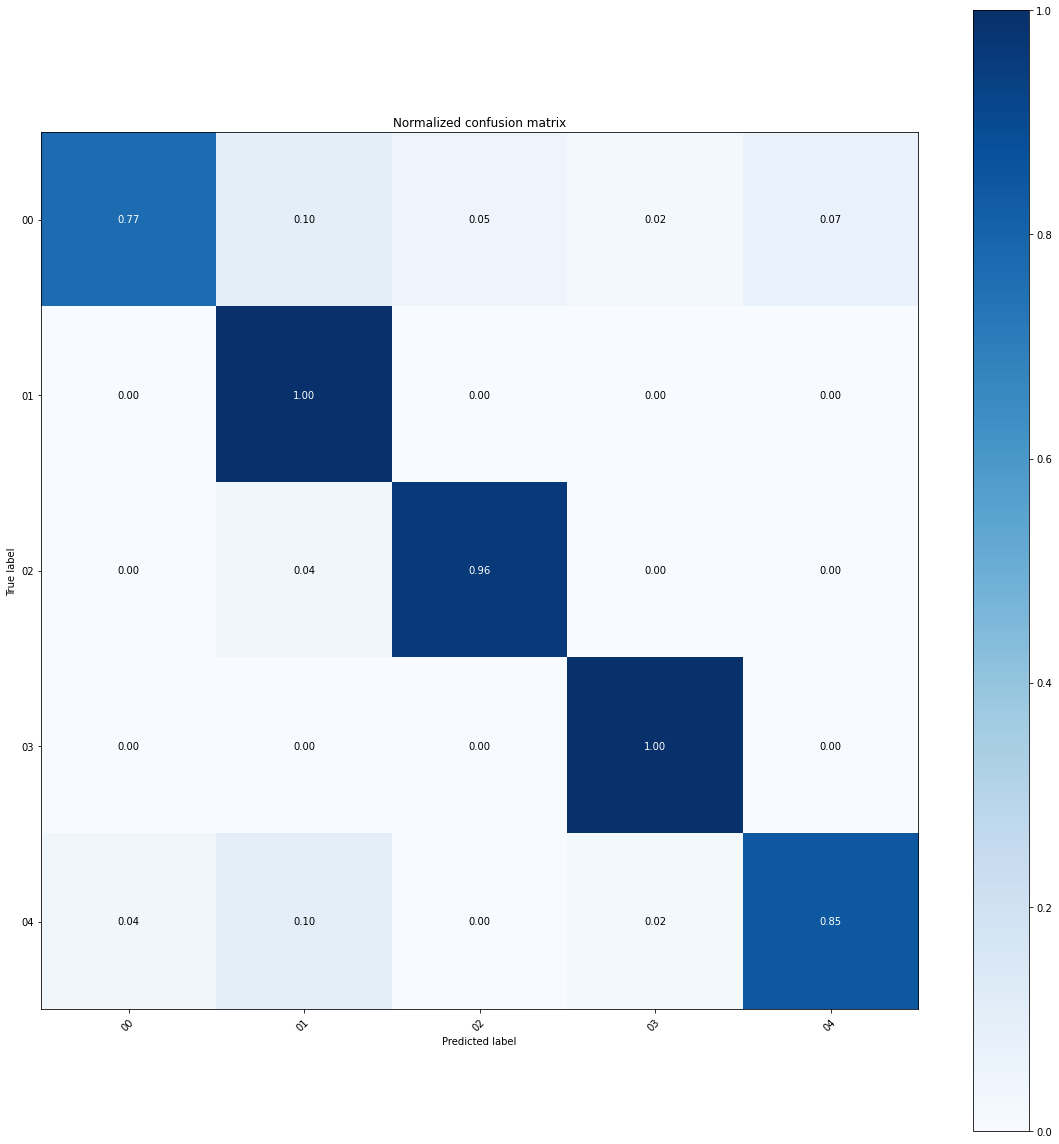

In [ ]:
class_names=["00","01","02","03","04"]
# Plot normalized confusion matrix
#plot_confusion_matrix(X=y_test, y_true=y_pred, labels=class_names)
X = plot_confusion_matrix1(y_test, y_pred,  class_names)

plt.savefig('/content/drive/MyDrive/pjt/fish/CM_vgg16_nov24.pdf',dpi=600,bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/pjt/fish/CM_vgg16_nov24.svg',dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
def build_VGG16():
    return model

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import cv2
import numpy as np
from gradcamutils import GradCam, GradCamPlusPlus, ScoreCam, build_guided_model, GuidedBackPropagation, superimpose, read_and_preprocess_img
import matplotlib.pyplot as plt

#model = VGG16(include_top=True, weights='imagenet')
layer_name = 'block5_conv3'

In [ ]:
img_path = '/content/drive/MyDrive/pjt/fish_01.png'
orig_img = np.array(load_img(img_path),dtype=np.uint8)
print(orig_img.shape)
img_array = read_and_preprocess_img(img_path, size=(96,96))
print(img_array.shape)

(136, 168, 3)
(1, 96, 96, 3)


In [ ]:
import tensorflow as tf
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('/content/drive/MyDrive/pjt/fish/S3_pjt_nov24_model2_vgg16_200.h5')

In [ ]:
grad_cam=GradCam(model,img_array,layer_name)
grad_cam_superimposed = superimpose(img_path, grad_cam)
grad_cam_emphasized = superimpose(img_path, grad_cam, emphasize=True)

grad_cam_plus_plus=GradCamPlusPlus(model,img_array,layer_name)
grad_cam_plus_plus_superimposed = superimpose(img_path, grad_cam_plus_plus)
grad_cam_plus_plus_emphasized = superimpose(img_path, grad_cam_plus_plus, emphasize=True)

score_cam=ScoreCam(model,img_array,layer_name)
score_cam_superimposed = superimpose(img_path, score_cam)
score_cam_emphasized = superimpose(img_path, score_cam, emphasize=True)

faster_score_cam=ScoreCam(model,img_array,layer_name, max_N=10)
faster_score_cam_superimposed = superimpose(img_path, faster_score_cam)
faster_score_cam_emphasized = superimpose(img_path, faster_score_cam, emphasize=True)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
print(score_cam_superimposed.shape)

(136, 168, 3)


In [ ]:
guided_model = build_guided_model(build_VGG16)
saliency = GuidedBackPropagation(guided_model, img_array, layer_name)
saliency_resized = cv2.resize(saliency, (orig_img.shape[1], orig_img.shape[0]))

grad_cam_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam = saliency_resized * grad_cam_resized[..., np.newaxis]

grad_cam_plus_plus_resized = cv2.resize(grad_cam_plus_plus, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam_plus_plus = saliency_resized * grad_cam_plus_plus_resized[..., np.newaxis]

score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_score_cam = saliency_resized * score_cam_resized[..., np.newaxis]

faster_score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_faster_score_cam = saliency_resized * faster_score_cam_resized[..., np.newaxis]

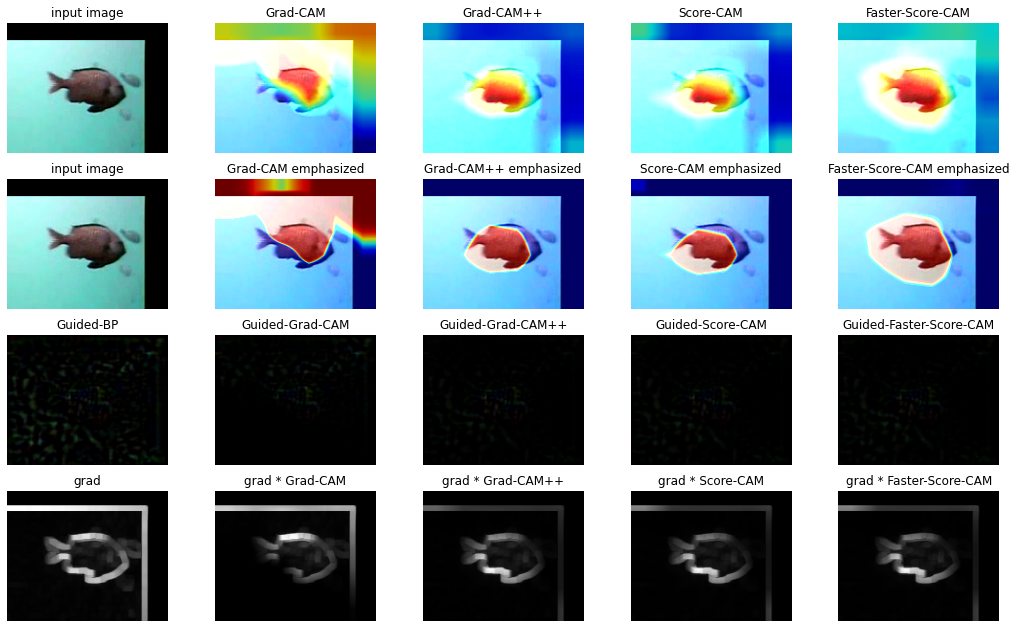

In [ ]:
img_gray = cv2.imread(img_path, 0)
dx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
grad = np.sqrt(dx ** 2 + dy ** 2)  # 画像の勾配を取得
grad = cv2.dilate(grad,kernel=np.ones((5,5)), iterations=1)  # 太らせる処理
grad -= np.min(grad)
grad /= np.max(grad)  # scale 0. to 1.

grad_times_grad_cam = grad * grad_cam_resized
grad_times_grad_cam_plus_plus = grad * grad_cam_plus_plus_resized
grad_times_score_cam = grad * score_cam_resized
grad_times_faster_score_cam = grad * faster_score_cam_resized

fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(18, 11))
ax[0,0].imshow(orig_img)
ax[0,0].set_title("input image")
ax[0,1].imshow(grad_cam_superimposed)
ax[0,1].set_title("Grad-CAM")
ax[0,2].imshow(grad_cam_plus_plus_superimposed)
ax[0,2].set_title("Grad-CAM++")
ax[0,3].imshow(score_cam_superimposed)
ax[0,3].set_title("Score-CAM")
ax[0,4].imshow(faster_score_cam_superimposed)
ax[0,4].set_title("Faster-Score-CAM")
ax[1,0].imshow(orig_img)
ax[1,0].set_title("input image")
ax[1,1].imshow(grad_cam_emphasized)
ax[1,1].set_title("Grad-CAM emphasized")
ax[1,2].imshow(grad_cam_plus_plus_emphasized)
ax[1,2].set_title("Grad-CAM++ emphasized")
ax[1,3].imshow(score_cam_emphasized)
ax[1,3].set_title("Score-CAM emphasized")
ax[1,4].imshow(faster_score_cam_emphasized)
ax[1,4].set_title("Faster-Score-CAM emphasized")
ax[2,0].imshow(saliency_resized)
ax[2,0].set_title("Guided-BP")
ax[2,1].imshow(guided_grad_cam)
ax[2,1].set_title("Guided-Grad-CAM")
ax[2,2].imshow(guided_grad_cam_plus_plus)
ax[2,2].set_title("Guided-Grad-CAM++")
ax[2,3].imshow(guided_score_cam)
ax[2,3].set_title("Guided-Score-CAM")
ax[2,4].imshow(guided_faster_score_cam)
ax[2,4].set_title("Guided-Faster-Score-CAM")
ax[3,0].imshow(grad, 'gray')
ax[3,0].set_title("grad")
ax[3,1].imshow(grad_times_grad_cam, 'gray')
ax[3,1].set_title("grad * Grad-CAM")
ax[3,2].imshow(grad_times_grad_cam_plus_plus, 'gray')
ax[3,2].set_title("grad * Grad-CAM++")
ax[3,3].imshow(grad_times_score_cam, 'gray')
ax[3,3].set_title("grad * Score-CAM")
ax[3,4].imshow(grad_times_faster_score_cam, 'gray')
ax[3,4].set_title("grad * Faster-Score-CAM")
for i in range(4):
    for j in range(5):
        ax[i,j].axis('off')
plt.savefig('/content/drive/MyDrive/pjt/fish/all_cams_vgg16_nov24.pdf',dpi=600,bbox_inches='tight')
plt.show()


In [ ]:
print("Grad-CAM")
%timeit grad_cam = GradCam(model, img_array, layer_name)
print("Grad-CAM++")
%timeit grad_cam_plus_plus = GradCamPlusPlus(model, img_array, layer_name)
print("Score-Cam")
%timeit score_cam = ScoreCam(model, img_array, layer_name)
print("Faster-Score-Cam N=10")
%timeit faster_score_cam = ScoreCam(model, img_array, layer_name, max_N=10)
print("Faster-Score-Cam N=3")
%timeit faster_score_cam = ScoreCam(model, img_array, layer_name, max_N=3)
print("Guided-BP")
%timeit saliency = GuidedBackPropagation(guided_model, img_array, layer_name)

Grad-CAM
1 loop, best of 5: 318 ms per loop
Grad-CAM++
1 loop, best of 5: 335 ms per loop
Score-Cam


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


1 loop, best of 5: 48 s per loop
Faster-Score-Cam N=10


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


1 loop, best of 5: 1.24 s per loop
Faster-Score-Cam N=3


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


1 loop, best of 5: 599 ms per loop
Guided-BP
1 loop, best of 5: 520 ms per loop


In [ ]:
img_path = '/content/drive/MyDrive/pjt/fish_02.png'
orig_img = np.array(load_img(img_path),dtype=np.uint8)
print(orig_img.shape)
img_array = read_and_preprocess_img(img_path, size=(96,96))
print(img_array.shape)

In [ ]:
predictions=model.predict(img_array)
print(np.max(predictions))
print(np.argmax(predictions))


0.98667604
0


In [ ]:
img_array.shape

(1, 96, 96, 3)

In [ ]:
img_path = '/content/drive/MyDrive/pjt/fish_01.png'
orig_img = np.array(load_img(img_path),dtype=np.uint8)
print(orig_img.shape)
img_array = read_and_preprocess_img(img_path, size=(96,96))
print(img_array.shape)

In [ ]:
score_cam1=ScoreCam(model,img_array,layer_name)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
res = cv2.resize(score_cam_emphasized, dsize=(96,96))

x = np.expand_dims(res, axis=0)
x.shape

(1, 96, 96, 3)

In [ ]:
predictions1=model.predict(x)
print(np.argmax(predictions))
print(predictions)

0
[[9.87e-01 2.00e-03 8.34e-08 1.04e-02 9.64e-04]]


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
img = load_img(score_cam_superimposed, target_size=(96,96)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

SyntaxError: ignored